In [1]:
from metrics_toolbox.builder import EvaluatorBuilder

from metrics_toolbox.metrics.enums import MetricNameEnum
from metrics_toolbox.reducers.enums import MetricReducerEnum

import numpy as np

# 1. Results dict

In [ ]:
evaluator = (
    EvaluatorBuilder()
    .add_metric("roc_auc_binary")
).build()

# First batch of data
y_true = np.array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0])
y_pred = np.array([0.1, 0.9, 0.4, 0.8, 0.35, 0.6, 0.7, 0.2, 0.55, 0.05])
evaluator.update_probs_evaluation(y_true, y_pred)

result = evaluator.results() # Get results dictionary, always containing these keys: 'summary', 'history', 'figures'
display(result)

{'reduced': {'roc_auc_binary_latest': 0.9166666666666667},
 'history': {'roc_auc_binary_steps': [0.9166666666666667]},
 'figures': {'roc_auc_curves': <Figure size 600x480 with 1 Axes>}}

## 2. AUC plots

{'reduced': {'roc_auc_binary_latest': 0.9},
 'history': {'roc_auc_binary_steps': [0.9166666666666667, 1.0, 0.9]},
 'figures': {'roc_auc_curves': <Figure size 600x480 with 1 Axes>}}

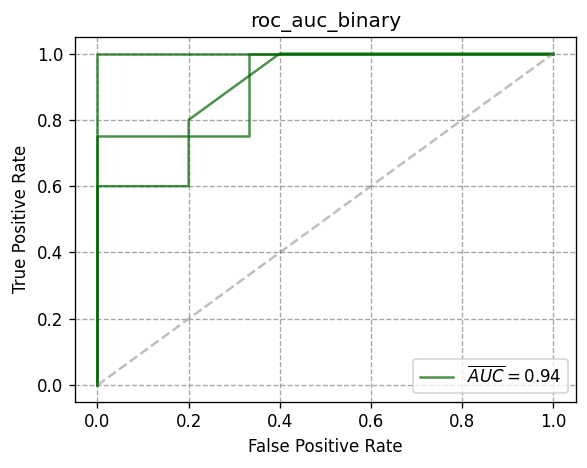

In [3]:
evaluator = (
    EvaluatorBuilder()
    .add_metric("roc_auc_binary")
).build()

# First batch of data
y_true = np.array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0])
y_pred = np.array([0.1, 0.9, 0.4, 0.8, 0.35, 0.6, 0.7, 0.2, 0.55, 0.05])
evaluator.update_probs_evaluation(y_true, y_pred)

# Second batch of data
y_true = np.array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0])
y_pred = np.array([0.8, 0.3, 0.6, 0.4, 0.9, 0.2, 0.1, 0.75, 0.85, 0.05])
evaluator.update_probs_evaluation(y_true, y_pred)

# Third batch of data
y_true = np.array([0, 0, 1, 1, 0, 1, 0, 1, 0, 1])
y_pred = np.array([0.2, 0.4, 0.9, 0.45, 0.3, 0.95, 0.1, 0.8, 0.5, 0.4])
evaluator.update_probs_evaluation(y_true, y_pred)

result = evaluator.results() # Get the evaluation results
display(result)

result['figures']['roc_auc_curves'] # The figure contains all folded ROC AUC curves

{'reduced': {'roc_auc_micro_max': 1.0,
  'roc_auc_micro_min': 0.99,
  'roc_auc_macro_mean': 1.0,
  'roc_auc_macro_min': 1.0,
  'roc_auc_class_std': 0.0,
  'roc_auc_class_1_minmax': 0.0,
  'roc_auc_class_2_latest': 1.0},
 'history': {'roc_auc_micro_steps': [0.99, 1.0],
  'roc_auc_macro_steps': [1.0, 1.0],
  'roc_auc_class_steps': [1.0, 1.0],
  'roc_auc_class_1_steps': [1.0, 1.0],
  'roc_auc_class_2_steps': [1.0, 1.0]},
 'figures': {'roc_auc_curves': <Figure size 1800x960 with 6 Axes>}}

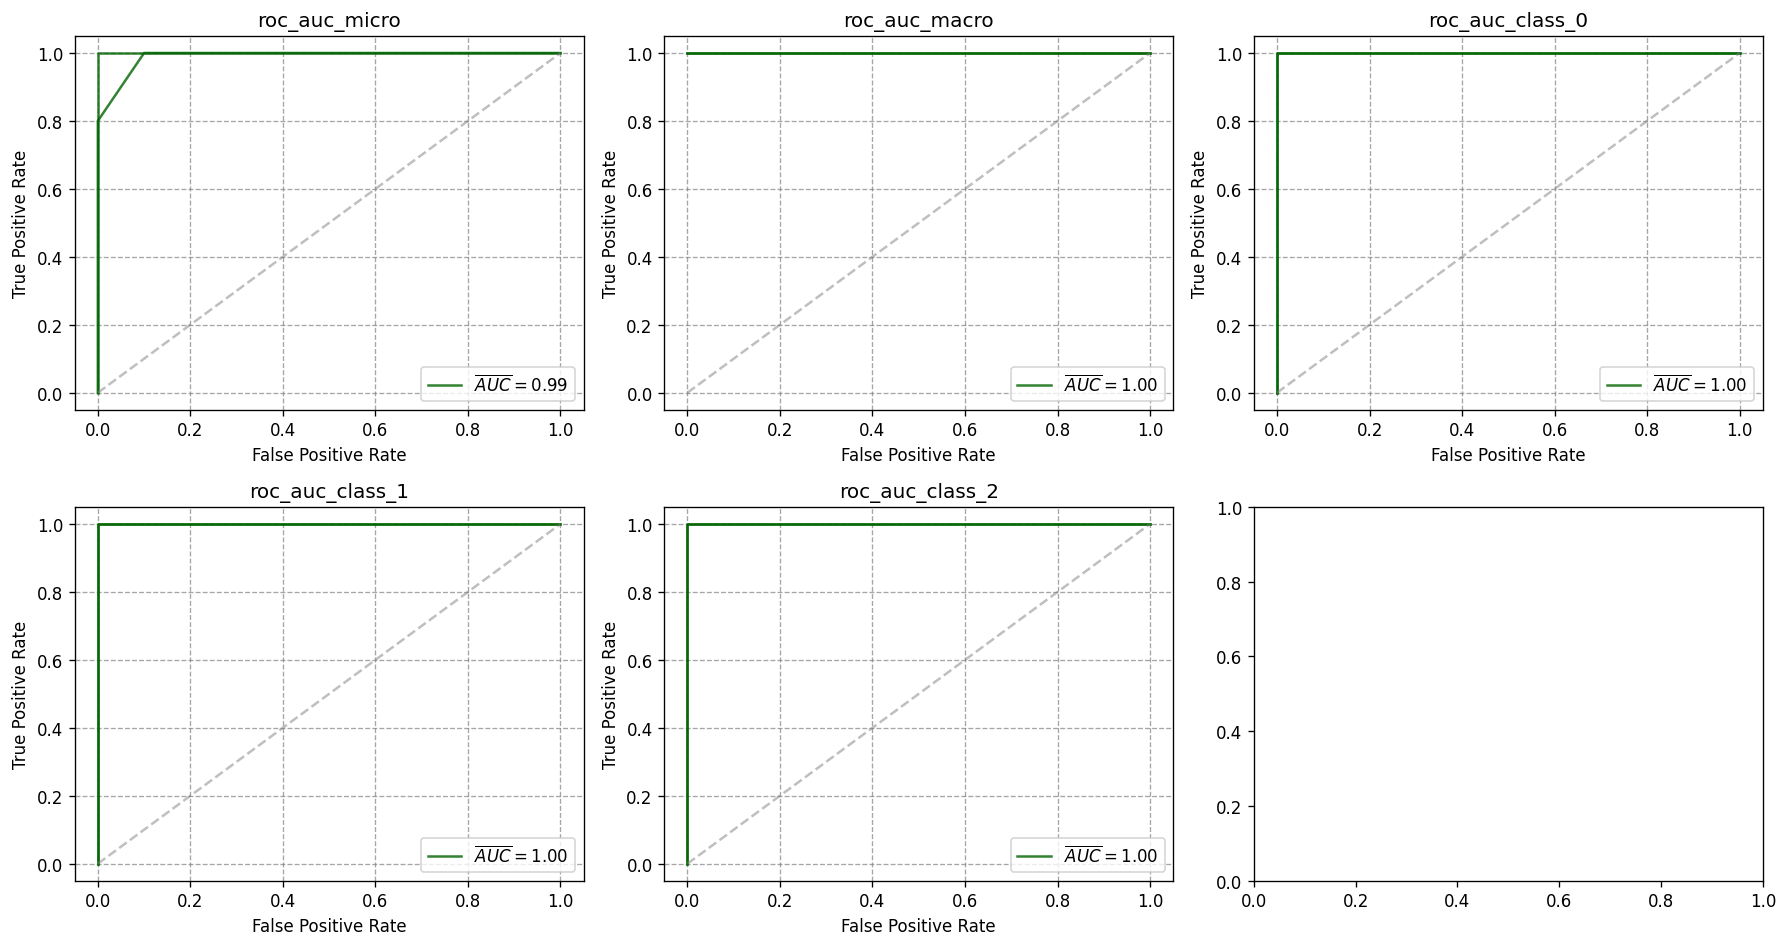

In [ ]:
evaluator = (
    EvaluatorBuilder()
    .add_metric("roc_auc_micro", reducers=["max", "min"])
    .add_metric("roc_auc_macro", reducers=["mean", "min"])
    .add_metric("roc_auc_class", reducers=["std"], class_name=0)
    .add_metric("roc_auc_class", reducers=["minmax"], class_name=1)
    .add_metric("roc_auc_class", reducers=["latest"], class_name=2)
).build()

# First batch of data
y_true = np.array([0, 1, 1, 2, 2, 1, 0, 2, 0, 1])
y_pred = np.array([
    [0.7, 0.2, 0.1],
    [0.1, 0.8, 0.1],
    [0.2, 0.6, 0.2],
    [0.3, 0.3, 0.4],
    [0.25, 0.25, 0.5],  
    [0.15, 0.7, 0.15],
    [0.6, 0.3, 0.1],
    [0.2, 0.4, 0.4],
    [0.5, 0.4, 0.1],
    [0.1, 0.85, 0.05]
])
evaluator.update_probs_evaluation(y_true, y_pred, classes=[0, 1, 2])

# Second batch of data
y_true = np.array([1, 0, 2, 1, 0, 2, 1, 0, 2, 1])
y_pred = np.array([
    [0.2, 0.7, 0.1],
    [0.6, 0.3, 0.1],
    [0.1, 0.2, 0.7],
    [0.25, 0.65, 0.1],
    [0.55, 0.35, 0.1],
    [0.15, 0.25, 0.6],
    [0.3, 0.6, 0.1],
    [0.7, 0.2, 0.1],
    [0.2, 0.3, 0.5],
    [0.1, 0.75, 0.15]
])
evaluator.update_probs_evaluation(y_true, y_pred, classes=[0, 1, 2])

result = evaluator.results() # Get the evaluation results
display(result)

result['figures']['roc_auc_curves'] # The figure dynamically contains folds for all ROC AUC Metrics